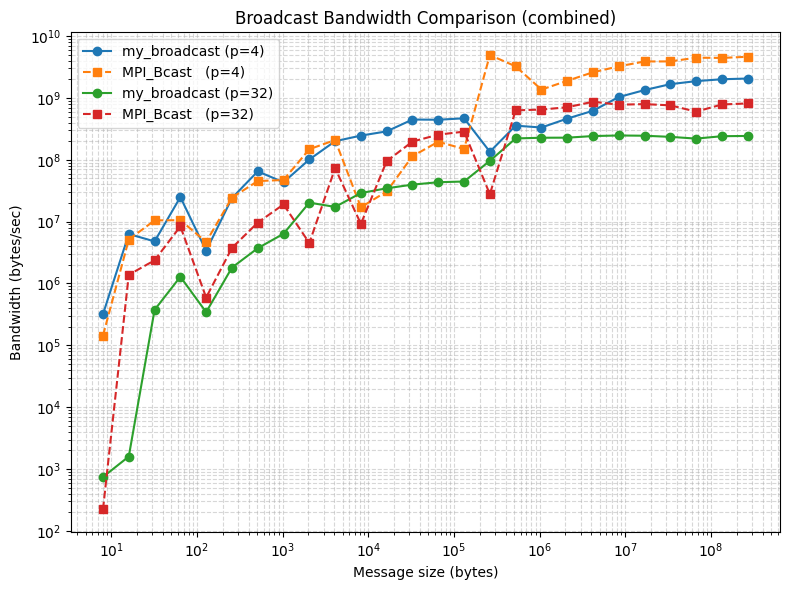

In [14]:
#!/usr/bin/env python3
import csv
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
# Filenames for the two process counts
files = {
    4:  'bandwidth_4proc.csv',
    32: 'bandwidth_32proc.csv'
}

# Markers for the two curves
markers = {
    'my_bw':  'o-',
    'mpi_bw': 's--'
}

# --- PLOT ---
plt.figure(figsize=(8,6))

for p, fname in files.items():
    xs = []
    my_bw = []
    mpi_bw = []
    # read CSV
    with open(fname, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            xs.append(int(row['bytes']))
            my_bw.append(float(row['my_bw']))
            mpi_bw.append(float(row['mpi_bw']))
    # plot both curves for this p
    plt.loglog(xs, my_bw, markers['my_bw'], label=f'my_broadcast (p={p})')
    plt.loglog(xs, mpi_bw, markers['mpi_bw'], label=f'MPI_Bcast   (p={p})')

plt.xlabel('Message size (bytes)')
plt.ylabel('Bandwidth (bytes/sec)')
plt.title('Broadcast Bandwidth Comparison (combined)')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('broadcast_bandwidth_combined.png')
plt.show()
